In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

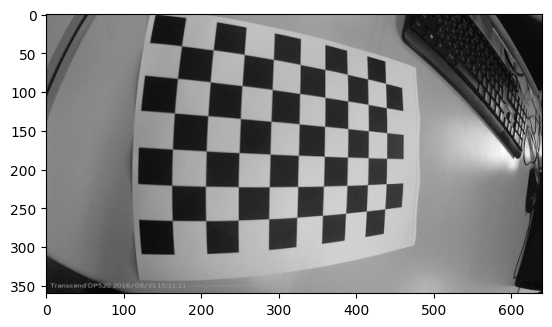

(360, 640)


In [3]:
image = cv.imread("checkerboard.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.show()
print(image.shape)

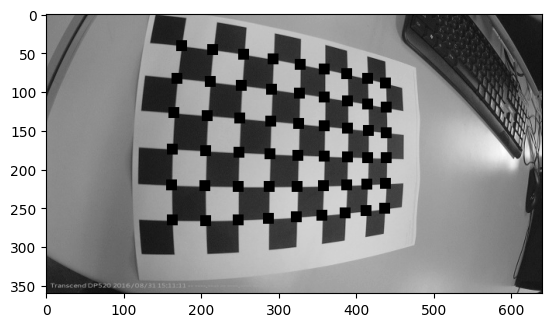

In [32]:
#Task 1
#Most Corners found with patternSize (6,9)
corners = cv.findChessboardCorners(image, (6,9))
'''for i in range(3,100):
    for j in range(3,100):
        corners = cv.findChessboardCorners(image, (i,j))
        if (corners[0] != False):
            print(i,j)
            print(f"the no. of corners are {corners[1].shape}")
            #print(corners)'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(image, corners[1], (6,9), (-1,-1), criteria)

corners2 = np.int32(corners)
image2 = image.copy()
for item in corners2:
    image2[item[0,1] - 7: item[0,1] + 7,item[0,0] - 7: item[0,0] + 7] = 0
    '''for row in range(item[0,0] - 10, item[0,0] + 10):
        if (row >= image2.shape[1] or row < 0):
            continue
            
        for col in range(item[0,1] - 10, item[0,1] + 10):
            if (col >= image2.shape[0] or col < 0):
                continue
            image2[col - 5: col + 5,row - 5: row + 5] = 255'''

plt.imshow(image2, cmap='gray')
plt.show()

Calibrated Camera Matrix is: 
[[793.49764422   0.         341.44865456]
 [  0.         849.28335499 221.25959486]
 [  0.           0.           1.        ]]
 and coefficients are [[-0.38279706  0.11997354  0.01289747 -0.01626414  0.31336445]]


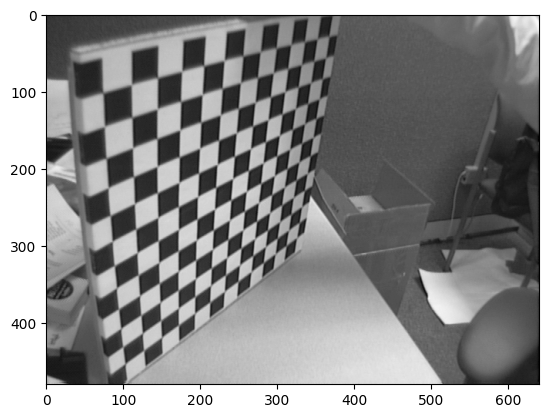

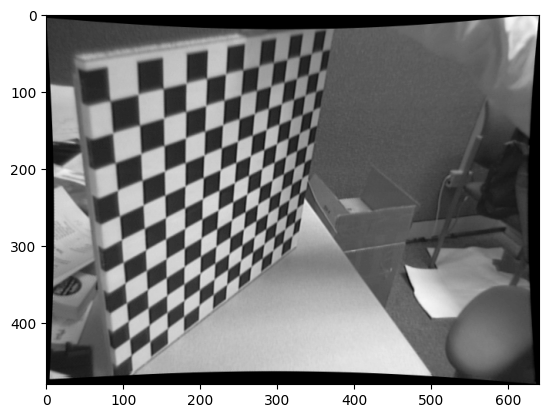

In [5]:
#Task 2
#Using a single image, window size is 12 x 12
objp = np.zeros((12*12,3), np.float32)
objp[:,:2] = np.mgrid[0:12,0:12].T.reshape(-1,2)

objpoints = [objp]

imgname = "calib_example\Image2.tif"
img = cv.imread(imgname)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, corners = cv.findChessboardCorners(gray, (12,12))
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners2 = cv.cornerSubPix(gray, corners, (12,12), (-1,-1), criteria)
imgpoints = [corners2] 

img = cv.imread("calib_example\Image20.tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(f"Calibrated Camera Matrix is: \n{mtx}\n and coefficients are {dist}")
#print(f"Original Camera Matrix is: {} and coefficients are {}")

h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv.undistort(gray, mtx, dist, None, newcameramtx)

plt.imshow(gray, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

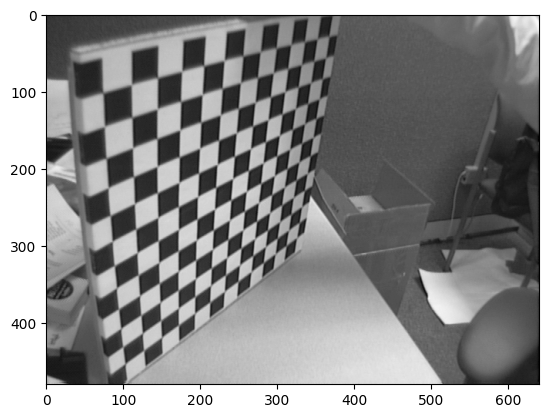

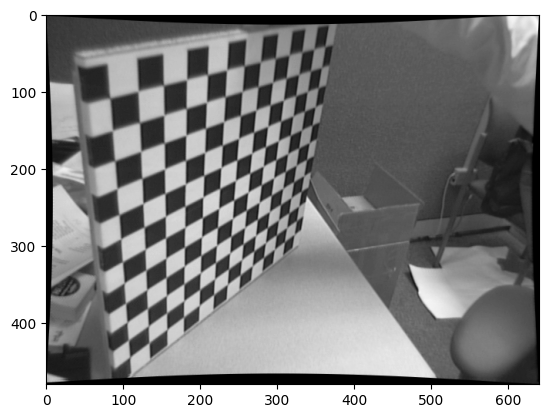

In [13]:
#Task 3
#Corners found at 12, 12 for the 20 images in calib_example
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((12*12,3), np.float32)
objp[:,:2] = np.mgrid[0:12,0:12].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for i in range(2,20):
    imgname = "calib_example\Image" + str(i) + ".tif"
    img = cv.imread(imgname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (12,12))
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray, corners, (12,12), (-1,-1), criteria)
        imgpoints.append(corners2)


img = cv.imread("calib_example\Image20.tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv.undistort(gray, mtx, dist, None, newcameramtx)

plt.imshow(gray, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

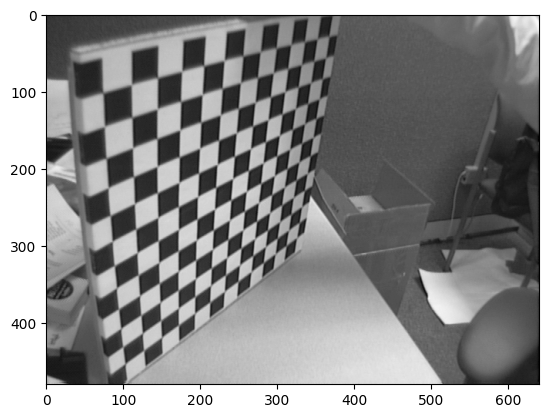

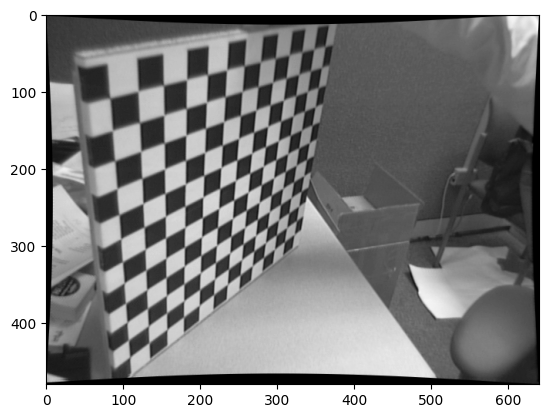

In [14]:
#Task 4
img = cv.imread("calib_example\Image20.tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
h,  w = gray.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv.undistort(gray, mtx, dist, None, newcameramtx)

plt.imshow(gray, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

In [15]:
#Task 5
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
 
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.026626860524068503
